# Haberman Cancer Survival dataset

source : [https://www.kaggle.com/gilsousa/habermans-survival-data-set]

The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

* number of cases = 305
* number of classes = 2
* number of features/attributes =4
* number of data points for patient who survived is 225 and for who does not is 85

##  Attribute/feature information 

 3. Age of patient at time of operation (numerical)
 2. Patient's year of operation (year - 1900, numerical)
 1. Number of positive axillary nodes detected (numerical)
 4. Survival status (class attribute) 1 = the patient survived 5 years or longer 2 = the patient died within 5 year.
 
## objective
 
* to find out, the new patient undergoes surgery for breast cancer will be able to survive 5 year (or longer) or not
 

In [1]:
# importing required libraries/modules.

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import colorama
from colorama import Style,Fore

'''download haberman.csv from https://www.kaggle.com/gilsousa/habermans-survival-data-set'''
# load haberman.csv into pandas dataFrame.
hbman = pd.read_csv("haberman.csv", names = ['age','Op_Year','axil_nodes_det','Surv_status'])
print(Style.BRIGHT + Fore.CYAN , hbman.head()) #cyan color

    age  Op_Year  axil_nodes_det  Surv_status
0   30       64               1            1
1   30       62               3            1
2   30       65               0            1
3   31       59               2            1
4   31       65               4            1


In [2]:
# To increase readibility of data, convert feature value of Surv_status(survival status)
#from 1 to survived and from 2 to dead.
hbman['Surv_status'] = hbman['Surv_status'].map({1:'survived', 2:'dead'})
print(Style.BRIGHT + Fore.CYAN , hbman.tail()) #cyan color

      age  Op_Year  axil_nodes_det Surv_status
301   75       62               1    survived
302   76       67               0    survived
303   77       65               3    survived
304   78       65               1        dead
305   83       58               2        dead


In [3]:
# (Q) how many data-points and features?
print (hbman.shape)

(306, 4)


In [4]:
#(Q) What are the column names in our dataset?
print (hbman.columns)

Index(['age', 'Op_Year', 'axil_nodes_det', 'Surv_status'], dtype='object')


In [5]:
hbman.describe()

,age,Op_Year,axil_nodes_det
count,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144
std,10.803452,3.249405,7.189654
min,30.000000,58.000000,0.000000
25%,44.000000,60.000000,0.000000
50%,52.000000,63.000000,1.000000
75%,60.750000,65.750000,4.000000
max,83.000000,69.000000,52.000000


In [6]:
# noumber of datapoints per class
hbman["Surv_status"].value_counts()
a = hbman["Surv_status"].value_counts()
print(a)

survived    225
dead         81
Name: Surv_status, dtype: int64


In [7]:
print('# all the surgeries performed during ''\033[1m''19{}''\033[0m'' to ''\033[1m''19{}''\033[0m''.'.format(hbman['Op_Year'].min(),hbman['Op_Year'].max()))
print('# age of patients varies from ''\033[1m''{} ''\033[0m''years old to ''\033[1m''{} ''\033[0m''years old.'.format(hbman['age'].min(),hbman['age'].max()))
print('# Number of positive axillary nodes detected varies from ''\033[1m''{} ''\033[0m''to ''\033[1m''{} ''\033[0m''.'.format(hbman['axil_nodes_det'].min(),hbman['axil_nodes_det'].max()))

# all the surgeries performed during 1958 to 1969.
# age of patients varies from 30 years old to 83 years old.
# Number of positive axillary nodes detected varies from 0 to 52 .


## PDF Plots 

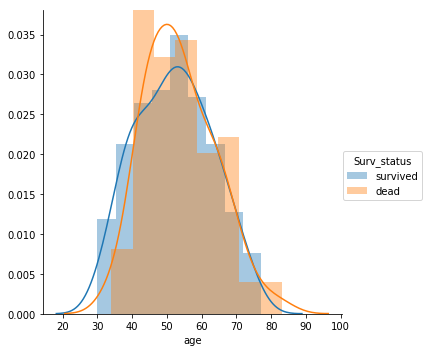

In [8]:
plt.close();
sns.FacetGrid(hbman, hue = "Surv_status",size = 5)\
   .map(sns.distplot, 'age')\
   .add_legend();
plt.show();

* This PDF is overlapping each other, but still we can say that people above age 40 are more likely to die.

* People less than age 40 are more likely to survive

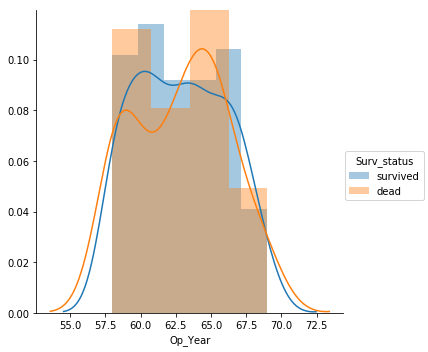

In [9]:
sns.FacetGrid(hbman, hue = "Surv_status",size = 5)\
   .map(sns.distplot, 'Op_Year')\
   .add_legend();
plt.show();

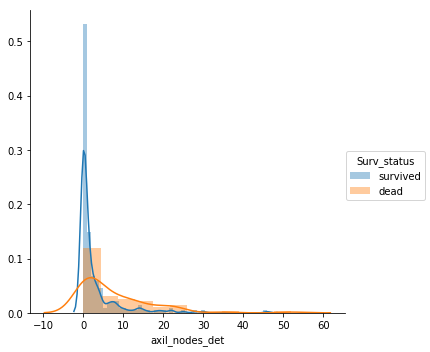

In [10]:
sns.FacetGrid(hbman, hue = "Surv_status",size = 5)\
   .map(sns.distplot, 'axil_nodes_det')\
   .add_legend();
plt.show();

* Less the no of axillary nodes more the chance of survival.

### Observations

* Pdf is overlapping significantly in each case. Hence we cannot easily conclude on basis of given data whether patient is able to survive or not.
* PDF for axillary nodes detected is similar to a power law distribution. hence we conclude that most of the patients have less no of axillary nodes(75% patients have axillary nodes less than 4).
* By analysing PDF for axillary nodes we can conclude chances for survival of a patient is more when no of axillary nodes is less (less than 4).
* People less than age 40 are more likely to survive than above age 40.

## CDF 

[0.05333333 0.10666667 0.12444444 0.09333333 0.16444444 0.16444444
 0.09333333 0.11111111 0.06222222 0.02666667]
[30.  34.7 39.4 44.1 48.8 53.5 58.2 62.9 67.6 72.3 77. ]
--------------------------------------------------


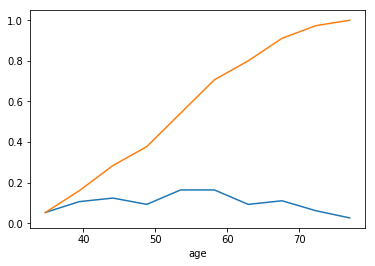

--------------------------------------------------
[0.18666667 0.10666667 0.10222222 0.07111111 0.09777778 0.10222222
 0.06666667 0.09777778 0.09333333 0.07555556]
[58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]
--------------------------------------------------


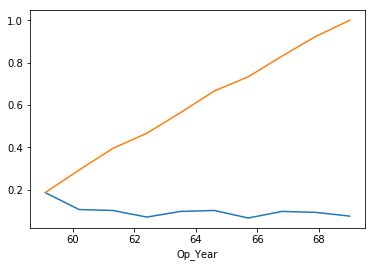

--------------------------------------------------
[0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]
--------------------------------------------------


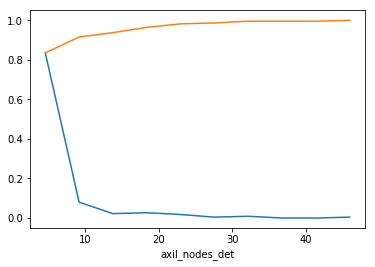

In [11]:
# CDF for survived patients respect to all the features

hbman_surv = hbman.loc[hbman['Surv_status'] == 'survived']
hbman_nsurv = hbman.loc[hbman['Surv_status'] == 'dead']

counts, bin_edges = np.histogram(hbman_surv['age'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
print('-'* 50)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf)
plt.xlabel('age')


plt.show()

counts, bin_edges = np.histogram(hbman_surv['Op_Year'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print('-'* 50)
print(pdf);
print(bin_edges);
print('-'* 50)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf)
plt.xlabel('Op_Year')


plt.show()

counts, bin_edges = np.histogram(hbman_surv['axil_nodes_det'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print('-'* 50)
print(pdf);
print(bin_edges);
print('-'* 50)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf)
plt.xlabel('axil_nodes_det')


plt.show()

[0.03703704 0.12345679 0.19753086 0.19753086 0.13580247 0.12345679
 0.09876543 0.04938272 0.02469136 0.01234568]
[34.  38.9 43.8 48.7 53.6 58.5 63.4 68.3 73.2 78.1 83. ]
--------------------------------------------------


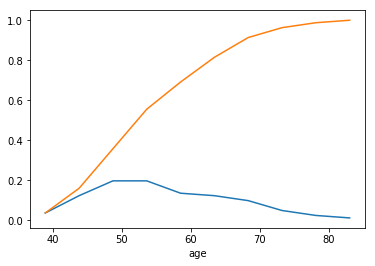

--------------------------------------------------
[0.25925926 0.04938272 0.03703704 0.08641975 0.09876543 0.09876543
 0.16049383 0.07407407 0.04938272 0.08641975]
[58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]
--------------------------------------------------


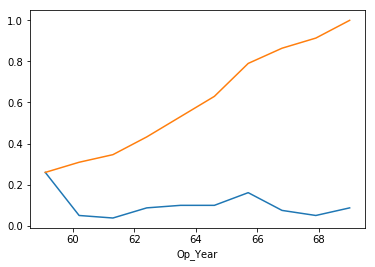

--------------------------------------------------
[0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]
--------------------------------------------------


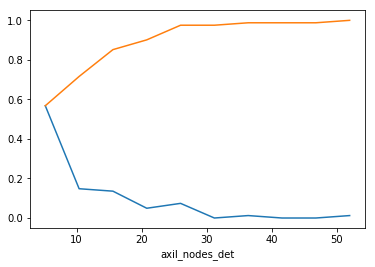

In [12]:
counts, bin_edges = np.histogram(hbman_nsurv['age'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
print('-'* 50)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf)
plt.xlabel('age')


plt.show()

counts, bin_edges = np.histogram(hbman_nsurv['Op_Year'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print('-'* 50)
print(pdf);
print(bin_edges);
print('-'* 50)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf)
plt.xlabel('Op_Year')


plt.show()

counts, bin_edges = np.histogram(hbman_nsurv['axil_nodes_det'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print('-'* 50)
print(pdf);
print(bin_edges);
print('-'* 50)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf)
plt.xlabel('axil_nodes_det')


plt.show()

In [13]:
print(Style.BRIGHT,'For patient who survived')
print('-'* 50)
a = np.percentile(hbman_surv["axil_nodes_det"],[90,95,99])
print(Style.NORMAL,'90th, 95th and 99th pecintile for axillary  nodes found are{}, {} and {} respectively'.format(a[0],a[1],a[2],))

print(Style.BRIGHT,'\nFor patient who died')
print('-'* 50)
a = np.percentile(hbman_nsurv["axil_nodes_det"],[90,95,99])
print(Style.NORMAL,'90th, 95th and 99th pecintile for axillary  nodes found are {}, {} and {} respectively'.format(a[0],a[1],a[2],))


 For patient who survived
--------------------------------------------------
 90th, 95th and 99th pecintile for axillary  nodes found are8.0, 14.0 and 27.279999999999973 respectively
 
For patient who died
--------------------------------------------------
 90th, 95th and 99th pecintile for axillary  nodes found are 20.0, 23.0 and 38.40000000000005 respectively


## Box Plots

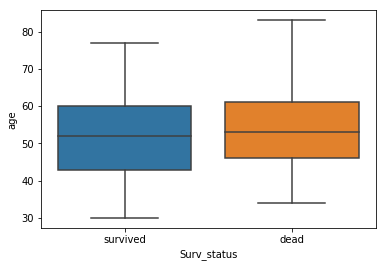

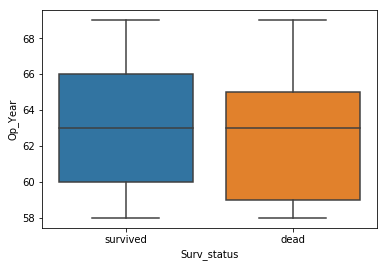

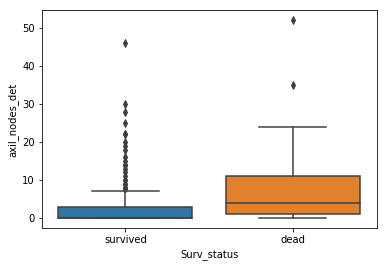

In [14]:
sns.boxplot(x = 'Surv_status', y = 'age', data = hbman)
plt.show()


sns.boxplot(x = 'Surv_status', y = 'Op_Year', data = hbman)
plt.show()


sns.boxplot(x = 'Surv_status', y = 'axil_nodes_det', data = hbman)
plt.show()

## Violoin Plots

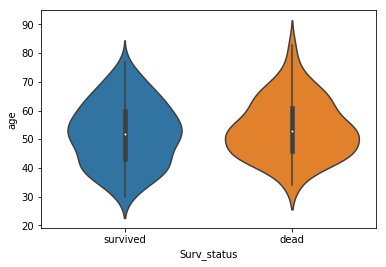

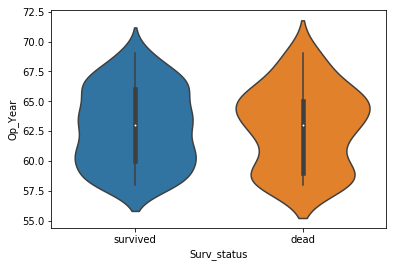

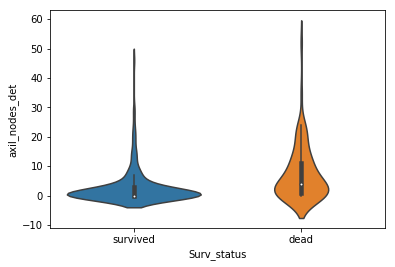

In [15]:
sns.violinplot(x="Surv_status", y="age", data=hbman, size=5)
plt.show()

sns.violinplot(x="Surv_status", y="Op_Year", data=hbman, size=5)
plt.show()

sns.violinplot(x="Surv_status", y="axil_nodes_det", data=hbman, size=5)
plt.show()

### Observations

After all the univariate analysis of haberman survival dataset we can conclude that:
 * Maximum patients who survived has less axillary nodes(maximum 4 in numbers).
 * Patient below age 40 has more chance of survival.
 * Concreate base for distuinguish between survived or died patient cannot be obtained.
 

## Scatter Plots

<function matplotlib.pyplot.show>

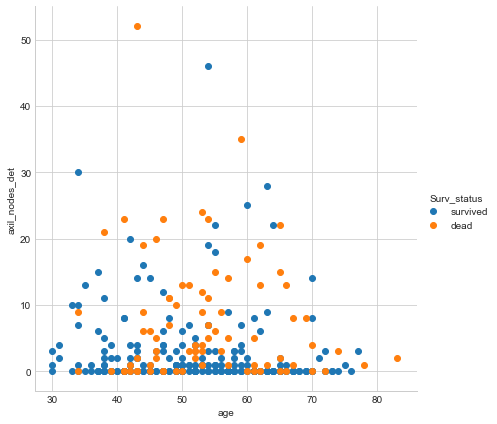

In [16]:
sns.set_style("whitegrid");
sns.FacetGrid(hbman, hue="Surv_status", size=6) \
   .map(plt.scatter, "age", "axil_nodes_det") \
   .add_legend();
plt.show

* Here with this scatter plot we get insight that patients with 0 axillary nodes are more likely to survive irrespective to there age.

* Maximum patients have axillary nodes less than 25.

<function matplotlib.pyplot.show>

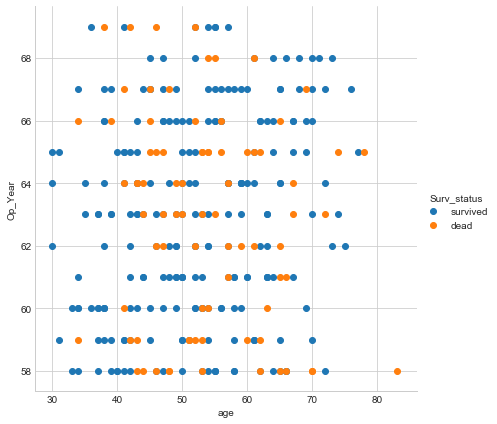

In [17]:
sns.set_style("whitegrid");
sns.FacetGrid(hbman, hue="Surv_status", size=6) \
   .map(plt.scatter, "age", "Op_Year") \
   .add_legend();
plt.show

<function matplotlib.pyplot.show>

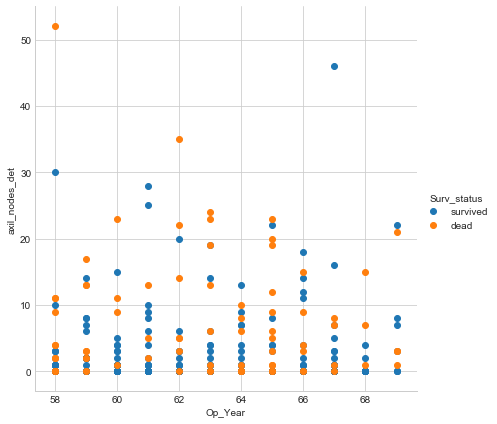

In [18]:
sns.set_style("whitegrid");
sns.FacetGrid(hbman, hue="Surv_status", size=6) \
   .map(plt.scatter, "Op_Year", "axil_nodes_det") \
   .add_legend();
plt.show

 * This doesn't give much information about the dataset, but we can say most of the operations which were done in year 1965 were unsuccessfull and in year 1961 were sucessfull.

## Pair Plots

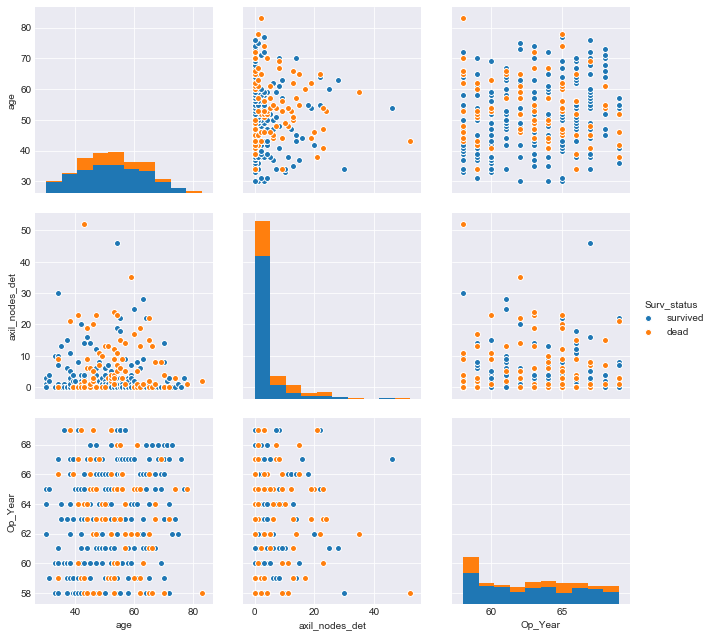

In [19]:
plt.close();
sns.set_style("darkgrid");
sns.pairplot(hbman, hue="Surv_status",vars = ['age','axil_nodes_det','Op_Year'], size=3);
plt.show()

### Observations

* Here with these scatter plot we get insight that patients with 0 axillary nodes are more likely to survive irrespective to there age.

* Maximum patients have axillary nodes less than 25.
* We can say most of the operations which were done in year 1965 were unsuccessfull and in year 1961 were sucessfull.

## Summary
* We can see that there is a high concentration of data point When number of axillary nodes belong to a range from 0 to 3.
* Patients with axillary nodes more than 25 are rare.
*  we get insight that patients with 0 axillary nodes are more likely to survive irrespective to there age.(sorce : axil_nodes_det vs age)
* Maximum patients who survived has less axillary nodes(maximum 4 in numbers).
* Patient below age 40 has more chance of survival.
* Less the no of axillary nodes more the chance of survival. 80 percent of people who survived have axillary nodes less than 4.
